In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "experiment"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

mpl.rcParams['font.family'] = ['serif']
mpl.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['font.size'] = 12

%matplotlib inline
%matplotlib notebook
%config InlineBackend.figure_format = 'svg'

In [4]:
import FTReading


class FTSensor():
    def __init__(self,IP = '192.168.1.101'):
        self.FTSensor = FTReading.FTReading('192.168.1.101')
        self.FTSensor.InitFT()
        self.data = self.FTSensor.GetReading(100)

    def GetData(self):
        self.data = self.FTSensor.GetReading(100)

        return self.data

In [10]:
def plot_sensor(ax,data):
    i = 0
    x = np.arange(0,200,1)
    
    y1 = data[0]
    y2 = data[1]

    if ax.lines :
        for line in ax.lines:
            line.set_xdata(x)       
            if i == 0:
                line.set_ydata(y1)

            elif i == 1:
                line.set_ydata(y2)

            i += 1
#             ax.legend(loc=2,fontsize=10)
    else:
        ax.plot(x, y1,'r')
        ax.plot(x, y2,'g')
#         ax.legend(loc=2,fontsize=10)
#     ax.relim()
#     ax.autoscale_view()
#     plt.gca()
    fig.subplots_adjust(bottom=0.2)
    fig.canvas.draw()
    fig.canvas.flush_events()

In [6]:
FTSensor = FTSensor(IP = '192.168.1.101')


Using matplotlib backend: nbAgg


<IPython.core.display.Javascript object>


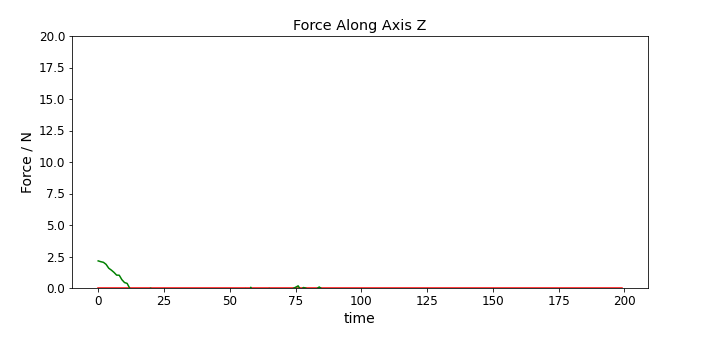

KeyboardInterrupt: 

In [14]:
%matplotlib auto

fig, ax1 = plt.subplots(1,1, figsize = (10,5))
ax1.set_ylim(0,20)


Ax,Ay = deque(np.zeros(200)),deque(np.zeros(200))
ax1.set_xlabel('time')
ax1.set_ylabel('Force / N')


ax1.set_title('Force Along Axis Z')

fig.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9,
                wspace=0.3, hspace=0.3)

while 1:
#     some_data = data.sample(n=1,replace = True)
#     x_data = some_data.drop(['p_index','m_index','Fx','Fy','Fz','Tx','Ty','Tz'], axis=1)

    Ax.popleft(); Ax.append(0)
    Ay.popleft(); Ay.append(FTSensor.GetData()[2])

    data_plot_1 = [np.array(Ax),np.array(Ay)]

    plot_sensor(ax1,data_plot_1)

    plt.ion() 